In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from TO_sim.Utility import *
import parmap

In [2]:
DF = 'Review/22.12.12/Normaldistribution/'
Create_Folder(DF)

In [107]:
N = 500
dist = 'Normal'
t_end = 200
ss = 14
N = 500
dK = 0.2
dt = 0.1
m = 6
applys = [1]
save = True
ms = [0.95,2,6]
Draw_ = DD(m=m,dist = 'normal')
df_sets = {}
rdf_sets = {}

for m in ms:
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=7)
    df_sets[m] = df
    rdf_sets[m] = rdf

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:66: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:71: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

In [24]:
m

0.95

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:66: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:71: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

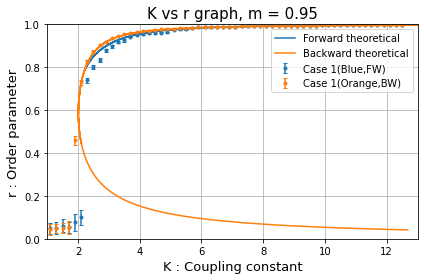

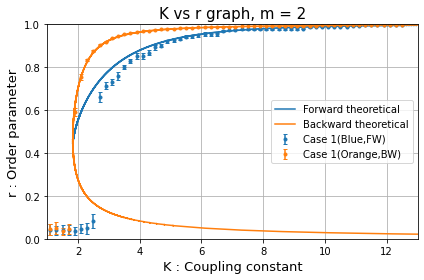

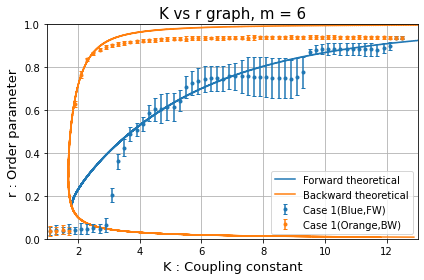

In [19]:
ST = 50
Ks = df.index
Ksr = rdf.index
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    Draw_ = DD(m=m,dist = 'normal')
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist},m = {m}, K vs r graph.png',dpi=400)

In [23]:
plt.figure(facecolor='white')
data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
Draw_ = DD(m=m,dist = 'normal')
Draw_.total()

plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

# plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
# plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
plt.legend()  
plt.title(f'K vs r graph, m = {m}',fontsize= 15)
plt.grid()

plt.xlim(1,13)
plt.ylim(0,1)

plt.xlabel('K : Coupling constant',fontsize=13)
plt.ylabel('r : Order parameter',fontsize=13)
plt.tight_layout()
plt.savefig(DF+f'{dist},m = {m}, K vs r graph.png',dpi=400)

NameError: name 'Ks' is not defined

<Figure size 432x288 with 0 Axes>

In [3]:
from IPython.display import HTML
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [108]:
# df = df_sets[m]
# rdf = rdf_sets[m]
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
def Make_avg_theta(df,m):
    ST = 50
    Ks = df.index
    Draw_ = DD(m)
    data = np.array([(np.mean(df.dtheta_s.iloc[i][-ST*10:,:],axis=0)) for i in range(len(Ks))])
    data_r = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rs = [df.rs.iloc[i][-ST*10:] for i in range(len(Ks))]
    data_max_rs = [np.max(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_min_rs = [np.min(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]

    i = 0
    K = Ks[i]
    fig,ax = plt.subplots(1)
    ax.plot(data[i],label = f'Forward')
    # ax.plot(r_data[i],label = f'Backward')
    ax.set_xlabel('i-th oscillator',fontsize=13)
    ax.set_ylabel(r'$\left\langle\dot{\theta}\right\rangle$'+': average phase vel.',fontsize=13)
    ax.grid()
    ax.set_ylim(-3,3)
    ax.legend()
    ax.set_title(f'N = {N}, m= {m}, K = {K}',fontsize=15)
    ax11 = plt.gca()
    divider11 = make_axes_locatable(ax11)
    cax11 = divider11.append_axes("right", size="10%", pad=0.10)
    ax2 = plt.gca()
    ax2t = ax2.twinx()
    ax2t.violinplot(data_rs[i],[0])
    # ax2t.violinplot(r_data_rs[i],[0])
    ax2t.plot(0,data_r[i],marker='d',color = 'tab:blue')
    # ax2t.plot(0,r_data_r[i],marker='d',color = 'tab:orange')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2t.set_ylabel('r: order parameter',fontsize=13)
    # plt.yticks('right')
    ax2t.set_ylim(0,1)
    def Animation(num):
        i = num
        K = Ks[i]
        ax.clear()
        ax2t.clear()
        ax.plot(data[i],label = f'K = {K}')
        # ax.plot(r_data[i],label = f'Backward')

        ax.set_xlabel('i-th oscillator',fontsize=13)
        ax.set_ylabel(r'$\left\langle\dot{\theta}\right\rangle$'+': average phase vel.',fontsize=13)
        ax.grid()
        ax.set_ylim(-3,3)
        ax.legend()
        ax.set_title(f'N = {N}, m= {m}, K = {K}',fontsize=15)
        ax2t.violinplot(data_rs[i],[0])
        # ax2t.violinplot(r_data_rs[i],[0])

        ax2t.plot(0,data_r[i],marker='d',color = 'tab:blue')
        # ax2t.plot(0,r_data_r[i],marker='d',color = 'tab:orange')

        ax2.set_xticks([])
        ax2.set_yticks([])
        ax2t.set_ylabel('r: order parameter',fontsize=13)
        # plt.yticks('right')
        ax2t.set_ylim(0,1)
    ani = FuncAnimation(fig,Animation,frames=np.arange(0,len(Ks)),interval=500)
    return ani

In [109]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:66: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:71: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:66: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:71: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:66: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:71: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]


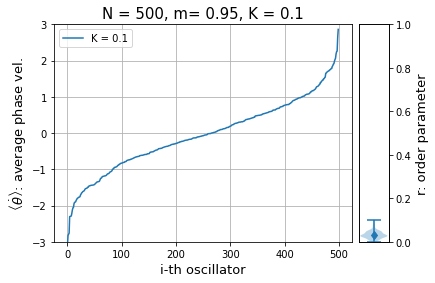

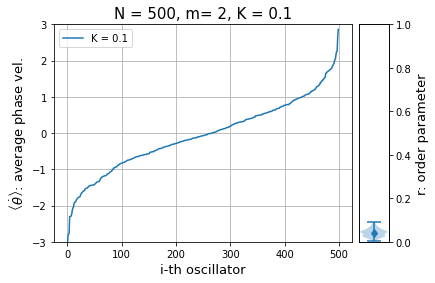

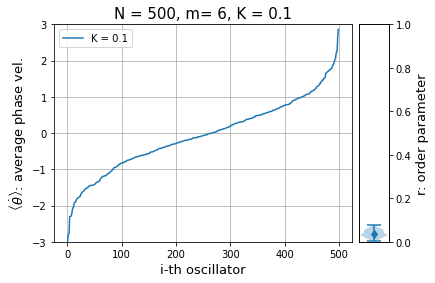

In [113]:
# ani = FuncAnimation(fig,Animation,frames=np.arange(0,len(Ks)),interval=500)
for m in ms:
    rdf = rdf_sets[m]
    ani = Make_avg_theta(rdf,m)
    HTML(ani.to_jshtml())
    ani.save(DF+f"N={N}, m={m}, K vs avg phase vel Backward.mp4",dpi=400)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:66: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\analytical\order_parameter.py:71: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]


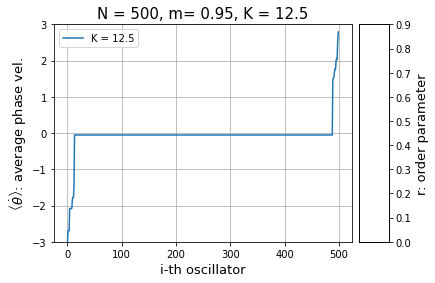

In [7]:
ani = Make_avg_theta(df,m)
HTML(ani.to_jshtml())

## Animation

In [10]:
from TO_sim.Animation import *

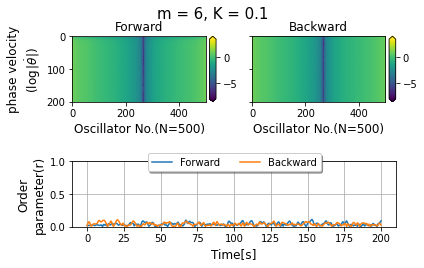

In [26]:
ani = Animation_logabs(df,rdf,N,m)

In [27]:
HTML(ani.to_jshtml())

In [69]:
df = df_sets[m]

In [101]:
Check_K,To_animate = Make_to_animate(df,[[3.5,0,199.9]],time_interval=5)

max_,min_
0.3017534637749053 -0.3020201824060931


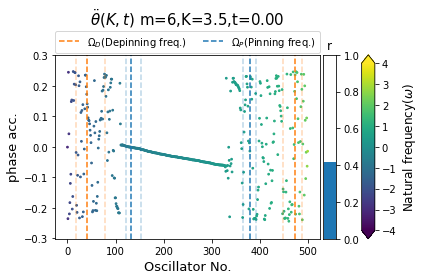

In [105]:
ani = ddtheta_animation(df,To_animate,Check_K,m)

In [ ]:
# 1. 같은 규모로 움직이나?
# 2. 

In [21]:
(4 / np.pi) * np.sqrt(4.5 / m)

2.771115151218733

In [106]:
HTML(ani.to_html5_video())

c:\Users\kim9y\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [53]:
# A =250- (250-KMR_lidx)
B =250- (KMR_ridx-250)


In [91]:
omega = df["Omega"][K_]
np.mean(omega)

-0.06496492258567281

In [36]:
KMR_lidx_max-KMR_lidx_min
KMR_ridx_max-KMR_ridx_min

4.1    21
Name: rs, dtype: int64

In [98]:
def theta_animation(df, To_animate, Check_K, m):
    int_ = np.linspace(0, 1, 100)
    color = plt.cm.viridis(int_)
    sorted_color = lambda x: color[np.searchsorted(int_, x)]
    sin = lambda x: np.sin(x)
    K_, t_s = To_animate[0]

    ts_ = df["ts"].iloc[0]
    rs_ = df["rs"]
    color_ = rs_.apply(sorted_color)
    df = df.loc[Check_K]
    df_ = df["theta_s"].apply(sin)
    N = df_.iloc[0].shape[1]
    omega = df["Omega"][K_]
    max_ = df_.apply(np.max).max()
    min_ = df_.apply(np.min).min()
    print("max,min")
    print(max_, min_)

    fig = plt.figure(facecolor="white")
    ax = fig.subplots()

    ax.set_ylim(min_, max_)
    ax.set_xlabel("Oscillator No.", fontsize=13)
    ax.set_ylabel(r"$sin(\theta)$", fontsize=13)
    t_s_time = ts_[t_s]
    title = ax.set_title(
        r"$\theta(K,t)$" + f" m={m},K={K_},t={t_s_time:.02f}", fontsize=15, pad=30
    )
    sca = ax.scatter(np.arange(1, N + 1), (df_[K_][t_s]), c=omega, vmin=-4, vmax=4, s=3)
    O_lset = lambda x: np.searchsorted(omega, -x)
    O_rset = lambda x: np.searchsorted(omega, x)
    KR = lambda df, K: df["rs"][K] * K
    KMR = lambda x, m: (4 / np.pi) * np.sqrt(x / m)
    KR_ = KR(df, Check_K)
    KMR_ = KR_.apply(KMR, m=m)
    KR_lidx = KR_.apply(O_lset)
    KR_ridx = KR_.apply(O_rset)
    # KR_lidx = N - KR_ridx
    KMR_lidx = KMR_.apply(O_lset)
    KMR_ridx = KMR_.apply(O_rset)
    # KMR_lidx = N - KMR_ridx
    min_omega = Check_min_omega(m)
    
    KMR_lidx_max=KMR_lidx.apply(np.max)
    KMR_lidx_min=KMR_lidx.apply(np.min)
    KMR_ridx_max=KMR_ridx.apply(np.max)
    KMR_ridx_min=KMR_ridx.apply(np.min)
    
    KR_lidx_max=KR_lidx.apply(np.max)
    KR_lidx_min=KR_lidx.apply(np.min)
    KR_ridx_max=KR_ridx.apply(np.max)
    KR_ridx_min=KR_ridx.apply(np.min)
    (kr_l,) = plt.plot(
        [KR_lidx[K_][t_s], KR_lidx[K_][t_s]],
        [min_, max_],
        ls="--",
        color="tab:orange",
        label=r"$\Omega_{D}$(Depinning freq.)",
    )
    (kr_r,) = plt.plot(
        [KR_ridx[K_][t_s], KR_ridx[K_][t_s]], [min_, max_], ls="--", color="tab:orange"
    )
    (kr_rmax,) = plt.plot(
        [KR_ridx_max[K_], KR_ridx_max[K_]], [min_, max_], ls='--', color="tab:orange",alpha=0.3
    )
    (kr_lmax,) = plt.plot(
        [KR_lidx_max[K_], KR_lidx_max[K_]], [min_, max_], ls='--', color="tab:orange",alpha=0.3
    )
    (kr_rmin,) = plt.plot(
        [KR_ridx_min[K_], KR_ridx_min[K_]], [min_, max_], ls='--', color="tab:orange",alpha=0.3
    )
    (kr_lmin,) = plt.plot(
        [KR_lidx_min[K_], KR_lidx_min[K_]], [min_, max_], ls='--', color="tab:orange",alpha=0.3
    )

    (kmr_l,) = plt.plot(
        [KMR_lidx[K_][t_s], KMR_lidx[K_][t_s]],
        [min_, max_],
        ls="--",
        color="tab:blue",
        label=r"$\Omega_{P}$(Pinning freq.)",
    )
    (kmr_r,) = plt.plot(
        [KMR_ridx[K_][t_s], KMR_ridx[K_][t_s]], [min_, max_], ls="--", color="tab:blue"
    )
    (kmr_rmax,) = plt.plot(
        [KMR_ridx_max[K_], KMR_ridx_max[K_]], [min_, max_], ls='--', color="tab:blue",alpha=0.3
    )
    (kmr_lmax,) = plt.plot(
        [KMR_lidx_max[K_], KMR_lidx_max[K_]], [min_, max_], ls='--', color="tab:blue",alpha=0.3
    )
    (kmr_rmin,) = plt.plot(
        [KMR_ridx_min[K_], KMR_ridx_min[K_]], [min_, max_], ls='--', color="tab:blue",alpha=0.3
    )
    (kmr_lmin,) = plt.plot(
        [KMR_lidx_min[K_], KMR_lidx_min[K_]], [min_, max_], ls='--', color="tab:blue",alpha=0.3
    )
    
    ax.legend(
        bbox_to_anchor=(0.0, 1.01, 1, 0.1),
        loc="lower left",
        mode="expand",
        borderaxespad=0,
        ncol=3,
    )

    divider = make_axes_locatable(ax)
    rax = divider.append_axes("right", size="5%", pad=0.1)
    cax = divider.append_axes("right", size="5%", pad=0.35)
    cbar = fig.colorbar(sca, cax=cax, ax=cax, orientation="vertical", extend="both")
    cbar.set_label("Natural frequency($\omega$)", fontsize=12)

    (rbar,) = rax.bar(0, rs_[K_][t_s], color=color_[K_][t_s])
    rax.set_ylim(0, 1)
    rax.set_title("r")
    rax.tick_params(
        labelleft=False,
        left=False,
        labelright=True,
        right=True,
        labelbottom=False,
        bottom=False,
    )
    fig.tight_layout()

    def Update(To_animate):
        K_, t_s = To_animate
        t_s_time = ts_[t_s]
        sca.set_offsets(np.c_[np.arange(1, N + 1), (df_[K_][t_s])])
        rbar.set_height(rs_[K_][t_s])
        rbar.set_color(color_[K_][t_s])
        kr_l.set_xdata([KR_lidx[K_][t_s], KR_lidx[K_][t_s]])
        kr_r.set_xdata([KR_ridx[K_][t_s], KR_ridx[K_][t_s]])
        kmr_l.set_xdata([KMR_lidx[K_][t_s], KMR_lidx[K_][t_s]])
        kmr_r.set_xdata([KMR_ridx[K_][t_s], KMR_ridx[K_][t_s]])
        kmr_rmin.set_xdata([KMR_ridx_min[K_], KMR_ridx_min[K_]])
        kmr_rmax.set_xdata([KMR_ridx_max[K_], KMR_ridx_max[K_]])
        kmr_lmin.set_xdata([KMR_lidx_min[K_], KMR_lidx_min[K_]])
        kmr_lmax.set_xdata([KMR_lidx_max[K_], KMR_lidx_max[K_]])
        
        kr_rmin.set_xdata([KR_ridx_min[K_], KR_ridx_min[K_]])
        kr_rmax.set_xdata([KR_ridx_max[K_], KR_ridx_max[K_]])
        kr_lmin.set_xdata([KR_lidx_min[K_], KR_lidx_min[K_]])
        kr_lmax.set_xdata([KR_lidx_max[K_], KR_lidx_max[K_]])
        
        title.set_text(r"$\theta(K,t)$" + f" m={m},K={K_},t={t_s_time:.02f}")

    ani = FuncAnimation(fig, Update, frames=To_animate, interval=50)
    return ani

In [104]:
def ddtheta_animation(df, To_animate, Check_K, m):
    int_ = np.linspace(0, 1, 100)
    color = plt.cm.viridis(int_)
    sorted_color = lambda x: color[np.searchsorted(int_, x)]

    K_, t_s = To_animate[0]
    ts_ = df["ts"].iloc[0]
    rs_ = df["rs"]
    color_ = rs_.apply(sorted_color)
    dt = ts_[1] - ts_[0]
    df = df.loc[Check_K]
    diff = lambda x: np.diff(x, axis=0) / dt
    df["ddtheta_s"] = df["dtheta_s"].apply(diff)
    df_ = df["ddtheta_s"]
    omega = df["Omega"][K_]
    max_ = df_.apply(np.max).max()
    min_ = df_.apply(np.min).min()

    print("max_,min_")
    print(max_, min_)
    N = df_.iloc[0].shape[1]

    fig = plt.figure(facecolor="white")
    ax = fig.subplots()
    ax.set_ylim(min_, max_)
    ax.set_xlabel("Oscillator No.", fontsize=13)
    ax.set_ylabel("phase acc.", fontsize=13)
    t_s_time = ts_[t_s]
    title = ax.set_title(
        r"$\ddot{\theta}(K,t)$" + f" m={m},K={K_},t={t_s_time:.02f}",
        fontsize=15,
        pad=30,
    )
    sca = ax.scatter(np.arange(N), (df_[K_][t_s]), c=omega, vmin=-4, vmax=4, s=3)
    KR = lambda df, K: df["rs"][K] * K
    KMR = lambda x, m: (4 / np.pi) * np.sqrt(x / m)
    O_lset = lambda x: np.searchsorted(omega, -x)
    O_rset = lambda x: np.searchsorted(omega, x)
    KR_ = KR(df, Check_K)
    KMR_ = KR_.apply(KMR, m=m)
    KR_lidx = KR_.apply(O_lset)
    KR_ridx = KR_.apply(O_rset)
    # KR_lidx = N - KR_ridx
    KMR_lidx = KMR_.apply(O_lset)
    KMR_ridx = KMR_.apply(O_rset)
    # KMR_lidx = N - KMR_ridx
    min_omega = Check_min_omega(m)
    
    KMR_lidx_max=KMR_lidx.apply(np.max)
    KMR_lidx_min=KMR_lidx.apply(np.min)
    KMR_ridx_max=KMR_ridx.apply(np.max)
    KMR_ridx_min=KMR_ridx.apply(np.min)
    
    KR_lidx_max=KR_lidx.apply(np.max)
    KR_lidx_min=KR_lidx.apply(np.min)
    KR_ridx_max=KR_ridx.apply(np.max)
    KR_ridx_min=KR_ridx.apply(np.min)
    
    (kr_l,) = plt.plot(
        [KR_lidx[K_][t_s], KR_lidx[K_][t_s]],
        [min_, max_],
        ls="--",
        color="tab:orange",
        label=r"$\Omega_{D}$(Depinning freq.)",
    )
    (kr_r,) = plt.plot(
        [KR_ridx[K_][t_s], KR_ridx[K_][t_s]], [min_, max_], ls="--", color="tab:orange"
    )
    (kr_rmax,) = plt.plot(
        [KR_ridx_max[K_], KR_ridx_max[K_]], [min_, max_], ls='--', color="tab:orange",alpha=0.3
    )
    (kr_lmax,) = plt.plot(
        [KR_lidx_max[K_], KR_lidx_max[K_]], [min_, max_], ls='--', color="tab:orange",alpha=0.3
    )
    (kr_rmin,) = plt.plot(
        [KR_ridx_min[K_], KR_ridx_min[K_]], [min_, max_], ls='--', color="tab:orange",alpha=0.3
    )
    (kr_lmin,) = plt.plot(
        [KR_lidx_min[K_], KR_lidx_min[K_]], [min_, max_], ls='--', color="tab:orange",alpha=0.3
    )

    (kmr_l,) = plt.plot(
        [KMR_lidx[K_][t_s], KMR_lidx[K_][t_s]],
        [min_, max_],
        ls="--",
        color="tab:blue",
        label=r"$\Omega_{P}$(Pinning freq.)",
    )
    (kmr_r,) = plt.plot(
        [KMR_ridx[K_][t_s], KMR_ridx[K_][t_s]], [min_, max_], ls="--", color="tab:blue"
    )
    (kmr_rmax,) = plt.plot(
        [KMR_ridx_max[K_], KMR_ridx_max[K_]], [min_, max_], ls='--', color="tab:blue",alpha=0.3
    )
    (kmr_lmax,) = plt.plot(
        [KMR_lidx_max[K_], KMR_lidx_max[K_]], [min_, max_], ls='--', color="tab:blue",alpha=0.3
    )
    (kmr_rmin,) = plt.plot(
        [KMR_ridx_min[K_], KMR_ridx_min[K_]], [min_, max_], ls='--', color="tab:blue",alpha=0.3
    )
    (kmr_lmin,) = plt.plot(
        [KMR_lidx_min[K_], KMR_lidx_min[K_]], [min_, max_], ls='--', color="tab:blue",alpha=0.3
    )

    divider = make_axes_locatable(ax)
    rax = divider.append_axes("right", size="5%", pad=0.05)
    cax = divider.append_axes("right", size="5%", pad=0.35)
    cbar = fig.colorbar(sca, cax=cax, ax=cax, orientation="vertical", extend="both")
    cbar.set_label("Natural frequency($\omega$)", fontsize=12)
    # ax.legend(bbox_to_anchor=(0.0, -.03), loc="lower left",bbox_transform=fig.transFigure, ncol=2)
    ax.legend(
        bbox_to_anchor=(0.0, 1.01, 1, 0.1),
        loc="lower left",
        mode="expand",
        borderaxespad=0,
        ncol=3,
    )
    (rbar,) = rax.bar(0, rs_[K_][t_s])
    rax.set_ylim(0, 1)
    rax.set_title("r")
    rax.tick_params(
        labelleft=False,
        left=False,
        labelright=True,
        right=True,
        labelbottom=False,
        bottom=False,
    )
    fig.tight_layout()

    def Update(To_animate):
        K_, t_s = To_animate
        t_s_time = ts_[t_s]
        sca.set_offsets(np.c_[np.arange(N), (df_[K_][t_s])])
        rbar.set_height(rs_[K_][t_s])
        rbar.set_color(color_[K_][t_s])
        kr_l.set_xdata([KR_lidx[K_][t_s], KR_lidx[K_][t_s]])
        kr_r.set_xdata([KR_ridx[K_][t_s], KR_ridx[K_][t_s]])
        kmr_l.set_xdata([KMR_lidx[K_][t_s], KMR_lidx[K_][t_s]])
        kmr_r.set_xdata([KMR_ridx[K_][t_s], KMR_ridx[K_][t_s]])
        kmr_rmin.set_xdata([KMR_ridx_min[K_], KMR_ridx_min[K_]])
        kmr_rmax.set_xdata([KMR_ridx_max[K_], KMR_ridx_max[K_]])
        kmr_lmin.set_xdata([KMR_lidx_min[K_], KMR_lidx_min[K_]])
        kmr_lmax.set_xdata([KMR_lidx_max[K_], KMR_lidx_max[K_]])
        
        kr_rmin.set_xdata([KR_ridx_min[K_], KR_ridx_min[K_]])
        kr_rmax.set_xdata([KR_ridx_max[K_], KR_ridx_max[K_]])
        kr_lmin.set_xdata([KR_lidx_min[K_], KR_lidx_min[K_]])
        kr_lmax.set_xdata([KR_lidx_max[K_], KR_lidx_max[K_]])
        
        title.set_text(r"$\ddot{\theta}(K,t)$" + f" m={m},K={K_},t={t_s_time:.02f}")

    ani = FuncAnimation(fig, Update, frames=To_animate, interval=50)
    return ani

# Normal distribtuion 그래프 그리기

In [3]:
import TO_sim.gen_Distribution as gen_D

In [41]:
2/np.pi

0.6366197723675814

In [47]:
theta, omega, Kc = gen_D.Normal(500,0,0.00001,seed = 7)
Kc

1.595769121605731e-05

In [23]:
from scipy.stats import norm

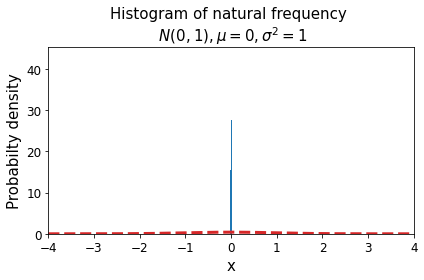

In [46]:
x = np.linspace(-4,4,1000)
y = lambda x :norm.pdf(x,0,1)
plt.plot(x,y(x),lw=3,color='tab:red',ls ='--')
plt.hist(omega,bins = 20,density=True);
plt.xlim(-4,4)
plt.xlabel('x',fontsize= 15)
plt.title('Histogram of natural frequency \n $N(0,1), \mu = 0, \sigma^2 = 1$',fontsize= 15)
plt.ylabel('Probabilty density',fontsize= 15)
plt.tick_params(labelsize=12)
plt.tight_layout()
# plt.savefig(DF+'Histogram of natural frequency N(0,1).png',dpi=400)

In [40]:
Kc

1.5957691216057306